# Analyze Telco Customer Churn: Exploratory Data Analysis
In preparation for a presentation to Telco executives about customer churn, the CFO is asking for an analysis and predictions for the factors that most impact churn at the company.

This notebook will include exploratory data analyis based on the clean summary data from the 1-Data_Prep notebook.

Questions to answer:
- Are there variables that are particularly significant in terms of understanding churn?
- What are the most appropriate tests to use to analyze these relationships?

## Summary of Process
1. **Load Dataset**: The cleaned data set from the 1-Data-Prep notebook was loaded.
2. **Visualize Distributions in Comparison to Churn**: For the categorical variables, countplots are used to visualize the data. Since the comparison between customers (e.g., how many male vs. female customers?) was already considered in the 1-Data_Prep notebook, the visuals included the target variable, Churn. For the numerical variables, histograms and boxplots are used to view the distribution of the datasets and visualize the variance. For both the categorical and numerical variables, the goal of the visual distributions to see which variables might have an impact on customer churn.
3. **Hypothesis Testing**: Once the categorical variables have been identified that might impact customer churn, hypothesis testing was conducted to seen which variables have statistically significant associations with churn using Chi-Square tests.

## Summary of EDA
**Distributions in Comparison to Churn**
- While gender does not appear to impact churn, senior citizen status does (if you are a senior citizen, you appear to be more likely to churn than non-senior citizens). Additionally, customers with partners or dependents are less likely to churn than those without. Finally, the customers with the shortest tenure are more likely to churn than those with longer tenure.
- Having phone service does not appear to impact churn, and neither does multiple lines or not. The type of internet service does appear to impact churn, however, with those customers having fiber optic being more likely to churn than those with DSL or without internet service.
- Paying for additional services when having internet service does appear to impact churn. Customers paying for online security, online backup, device protection, or tech support are less likely to churn than those that don't pay for those services. Paying for streaming TV or streaming movies, however, does not appear to have the same impact on churn.
- Customers paying month-to-month and those with paperless billing appear to be more likely to churn than those paying on longer contracts and those without paperless billing. Additionally, customers who pay with an electronic check are more likely to churn than any of the other payment methods. Customer churn is the highest amongst those payment around \\$70-80 and customer churn decreases as total charges increase.

**So, the following variables appear to have some impact (increasing) on customer churn:**
1. Being a senior citizen (categorical)
2. Not having a partner (categorical)
3. Not having dependents (categorical)
4. Having a shorter tenure (discrete numerical)
5. Having fiber optic internet service (categorical)
6. Not paying for additional internet services like online security, online backup, device protection, or tech support (categorical)
7. Paying month-to-month (categorical)
8. Having paperless billing (categorical)
9. Using electronic check to pay. (categorical)
10. Paying around \\$70-80 dollars a month (continuous numerical)
11. Having a lower total charge (continuous numerical)

**Hypothesis Testing**
- To test if the variables have a statistically signficiant association, two types of hypothesis testing was done. First, the Chi-Square test was run for the 11 categorical variables that demonstrated some level of impact on customer churn. The Chi-Square test was chosen as the churn variable is also categorical. **All 11 categorical variables were shown to have a significant association with customer churn.**

## Data Sources
- summary.csv: cleaned dataset from the 1-Data_Prep Notebook

## Import Libraries

In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

## File Locations

In [2]:
summary_file = Path.cwd() / "data" / "processed" / f"summary.csv"

In [3]:
df = pd.read_csv(summary_file)

## Distributions of Data in Comparison to Churn

### Demographics & Tenure: Gender, SeniorCitizen, Partner, Dependents, Tenure
Code adapted from https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

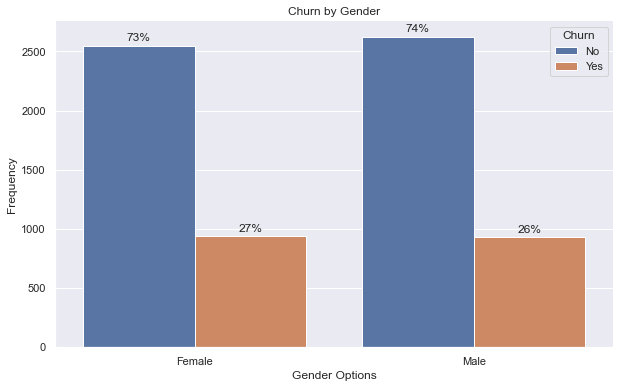

In [4]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('Gender Options')
plt.ylabel('Frequency')
plt.title('Churn by Gender')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

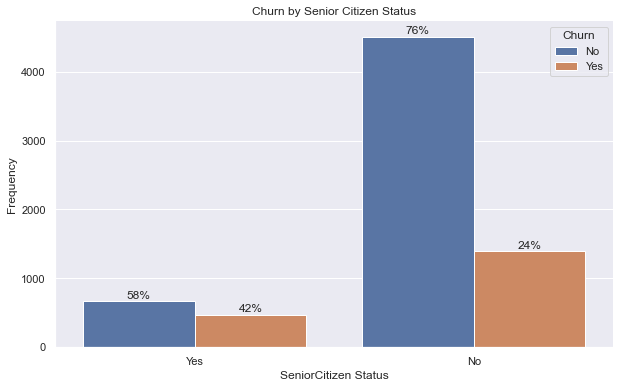

In [5]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn', order = ['Yes', 'No'])
plt.xlabel('SeniorCitizen Status')
plt.ylabel('Frequency')
plt.title('Churn by Senior Citizen Status')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

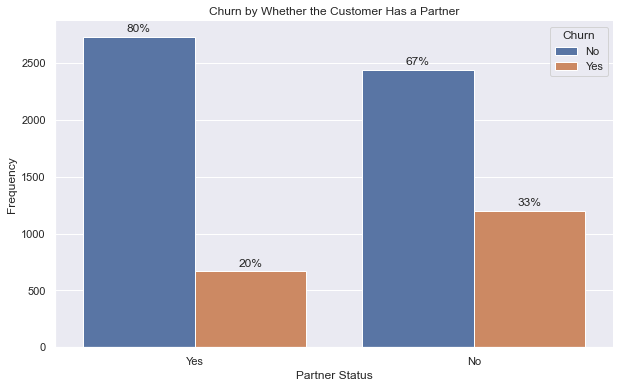

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Partner', data=df, hue='Churn', order = ['Yes', 'No'])
plt.xlabel('Partner Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether the Customer Has a Partner')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

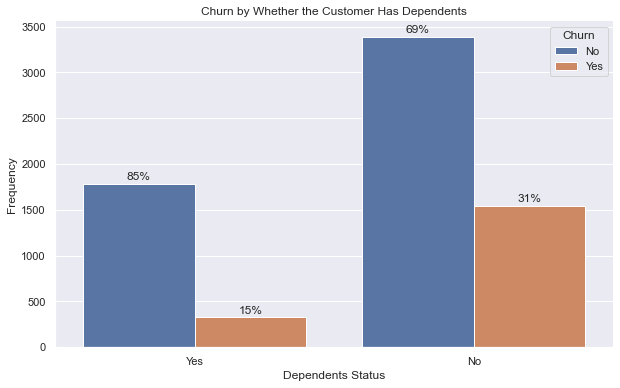

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Dependents', data=df, hue='Churn', order = ['Yes', 'No'])
plt.xlabel('Dependents Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether the Customer Has Dependents')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

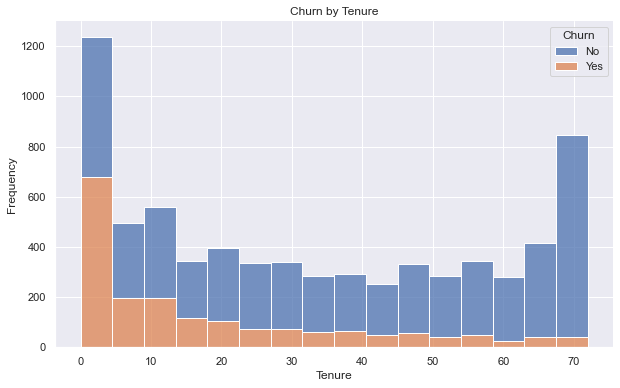

In [8]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=df,
              x='tenure',
            hue='Churn',
                 multiple='stack')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Churn by Tenure')
sns.despine()
plt.show()

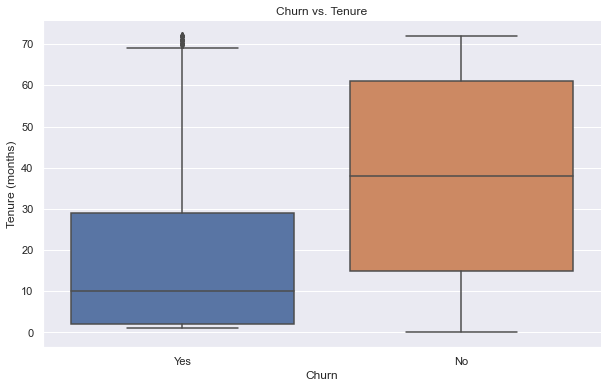

In [9]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=df,
              x='Churn', y='tenure', order=['Yes', 'No'])
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.title('Churn vs. Tenure')
sns.despine()
plt.show()

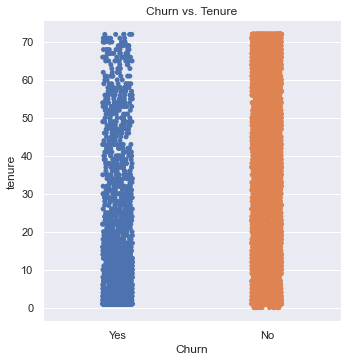

In [10]:
sns.catplot(y = 'tenure', x = 'Churn', data=df, order = ['Yes', 'No'])
plt.title('Churn vs. Tenure')
sns.despine()
plt.show()

### Phone & Internet Service: PhoneService, MultipleLines, InternetService

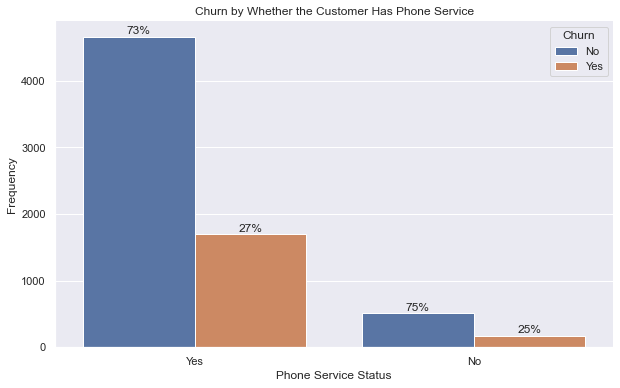

In [11]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='PhoneService', data=df, hue='Churn', order = ['Yes', 'No'])
plt.xlabel('Phone Service Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether the Customer Has Phone Service')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

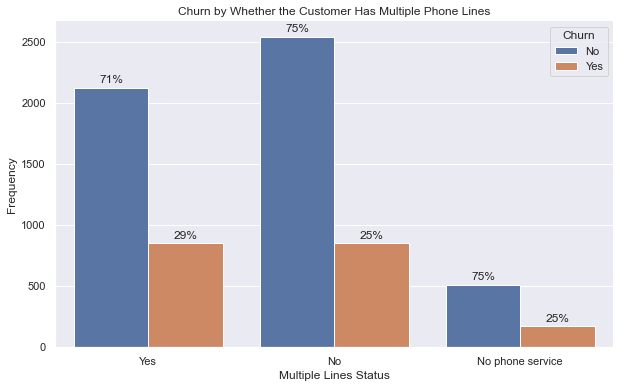

In [12]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='MultipleLines', data=df, hue='Churn', order = ['Yes', 'No', 'No phone service'])
plt.xlabel('Multiple Lines Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether the Customer Has Multiple Phone Lines')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

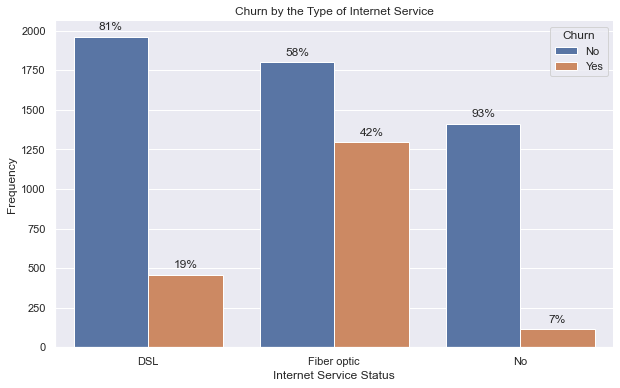

In [13]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='InternetService', data=df, hue='Churn', order = ['DSL', 'Fiber optic', 'No'])
plt.xlabel('Internet Service Status')
plt.ylabel('Frequency')
plt.title('Churn by the Type of Internet Service')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

### Additional Options: OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

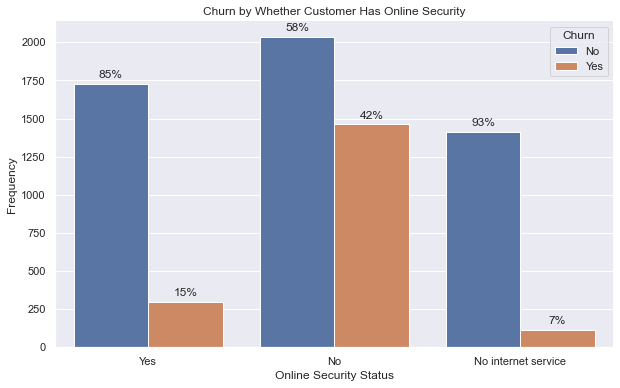

In [14]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='OnlineSecurity', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Online Security Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Online Security')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

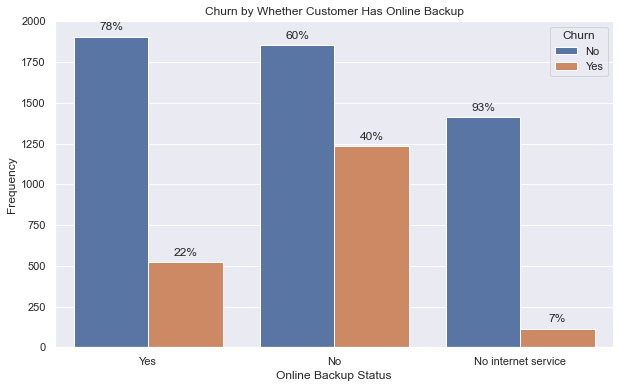

In [15]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='OnlineBackup', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Online Backup Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Online Backup')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

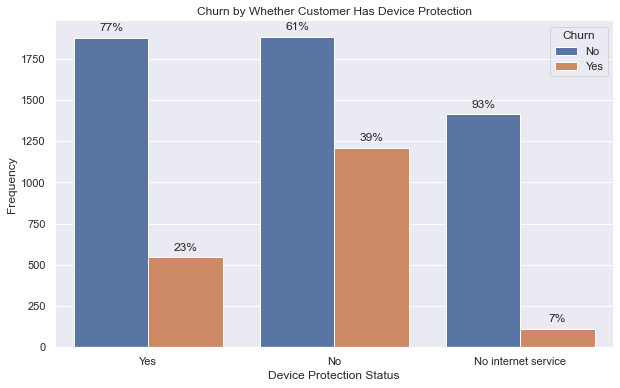

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='DeviceProtection', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Device Protection Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Device Protection')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

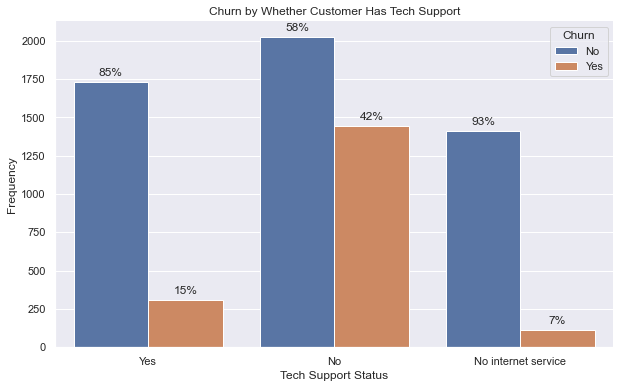

In [17]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='TechSupport', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Tech Support Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Tech Support')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

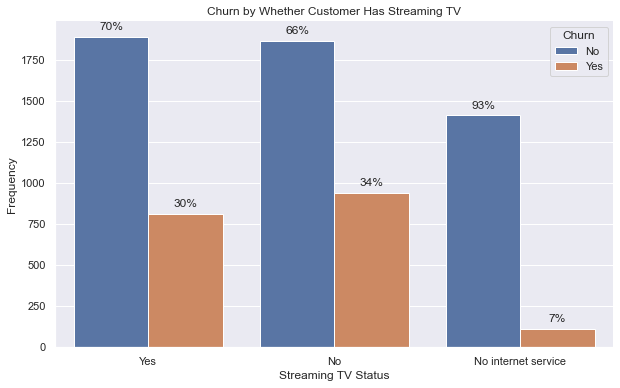

In [18]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='StreamingTV', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Streaming TV Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Streaming TV')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

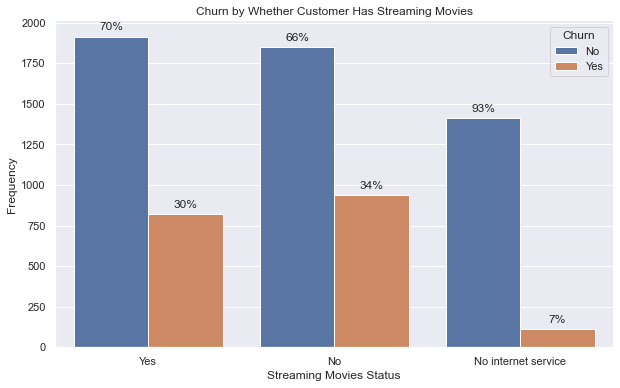

In [19]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='StreamingMovies', data=df, hue='Churn', order = ['Yes', 'No', 'No internet service'])
plt.xlabel('Streaming Movies Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether Customer Has Streaming Movies')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

### Payment: Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

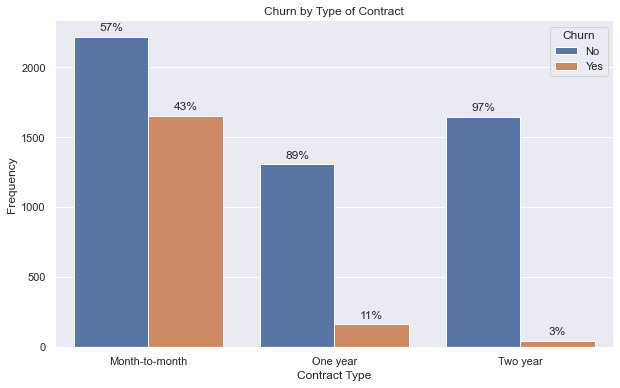

In [20]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='Contract', data=df, hue='Churn')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.title('Churn by Type of Contract')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

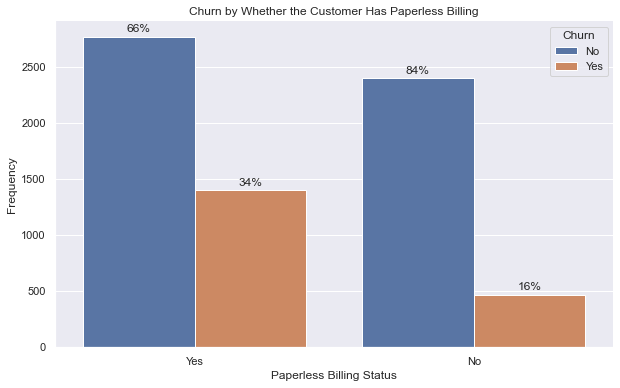

In [21]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='PaperlessBilling', data=df, hue='Churn', order = ['Yes', 'No'])
plt.xlabel('Paperless Billing Status')
plt.ylabel('Frequency')
plt.title('Churn by Whether the Customer Has Paperless Billing')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

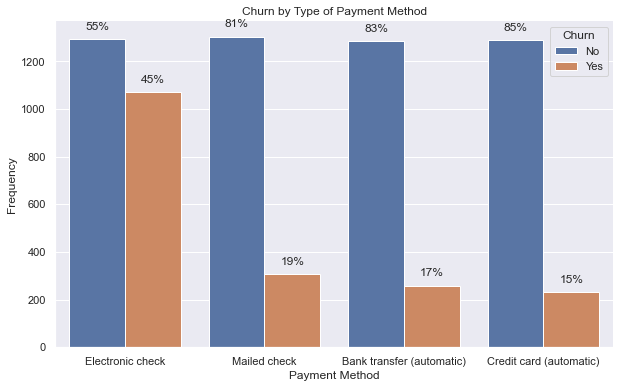

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.title('Churn by Type of Payment Method')
sns.despine()

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")

plt.show()

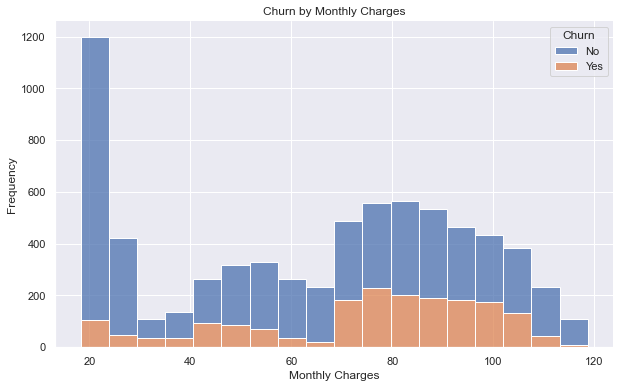

In [23]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=df,
              x='MonthlyCharges',
            hue='Churn',
                 multiple='stack')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Churn by Monthly Charges')
sns.despine()
plt.show()

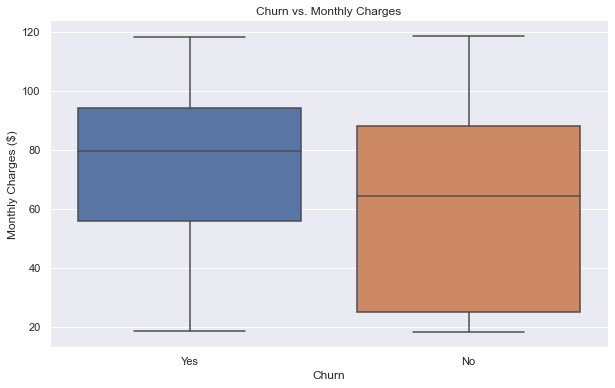

In [24]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=df,
              x='Churn', y='MonthlyCharges', order = ['Yes', 'No'])
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.title('Churn vs. Monthly Charges')
sns.despine()
plt.show()

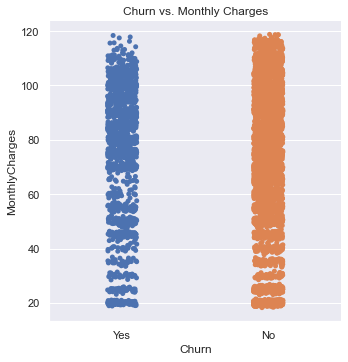

In [25]:
sns.catplot(y = 'MonthlyCharges', x = 'Churn', data=df, order = ['Yes', 'No'])
plt.title('Churn vs. Monthly Charges')
sns.despine()
plt.show()

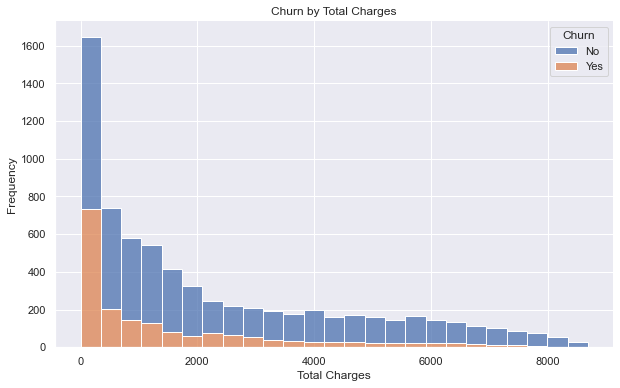

In [26]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(data=df,
              x='TotalCharges',
            hue='Churn',
                 multiple='stack')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Churn by Total Charges')
sns.despine()
plt.show()

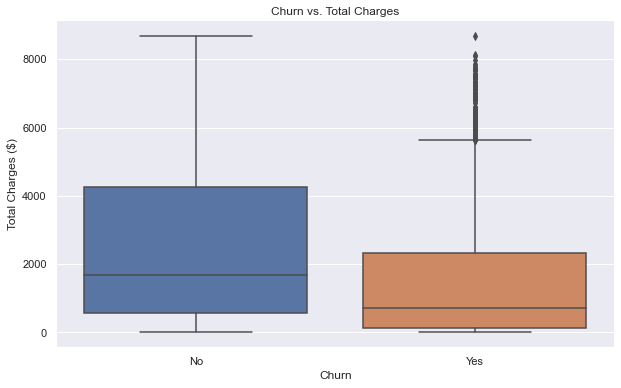

In [27]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=df,
              x='Churn', y='TotalCharges')
plt.xlabel('Churn')
plt.ylabel('Total Charges ($)')
plt.title('Churn vs. Total Charges')
sns.despine()
plt.show()

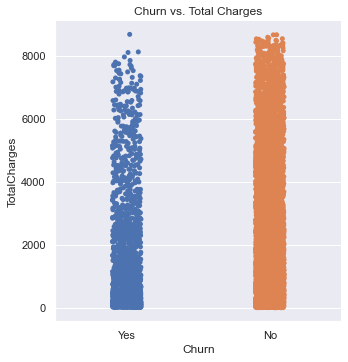

In [28]:
sns.catplot(y = 'TotalCharges', x = 'Churn', data=df, order = ['Yes', 'No'])
plt.title('Churn vs. Total Charges')
sns.despine()
plt.show()

## Chi-Square Tests

Based on the analysis above, there are several categorical variables that appear to have relationships with the target variable, churn. As a result, chi-square tests will be run to see which categorical variables have significant relationships:

1. SeniorCitizen
2. Partner
3. Dependents
4. InternetService
5. OnlineSecurity
6. OnlineBackup
7. DeviceProtection
8. TechSupport
9. Contract
10. PaperlessBilling
11. PaymentMethod

The null hypothesis for each variable will be that there is **no relationship** between the variables. The alternative hypothesis is that there is a **significant relationships** between the variables. 

A chi-square test will be used with an **alpha value of 0.05**. If the p-value calculated through the chi-square test is less than 0.05, the null hypothesis will be rejected. 

In [29]:
# Define a function to return the results of the chi-square test given a test variable and the target variable (adapted from: https://predictivehacks.com/how-to-run-chi-square-test-in-python/)
def chi_results(test_variable, target_variable='Churn', alpha=0.05):
    
    #Create a contingency table
    contingency = pd.crosstab(df[test_variable], df[target_variable])
    
    #Run the chi-square test using the contingency table
    c, p, dof, expected = chi2_contingency(contingency)
    print('p = ', p)
    
    #Compare the p-value to the alpha
    if p > alpha:
        print('The p-value is greater than', alpha, 'so the null hypothesis cannot be rejected. There is no relationship between', test_variable, 'and customer churn.')
    else:
        print('The p-value is less or equal to than', alpha, 'so the null hypothesis is rejected and there is a significant relationship between', test_variable, 'and customer churn.')

In [30]:
# Create a list of the categorical variables to test
cat_to_test = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'Contract', 'PaperlessBilling', 'PaymentMethod']

In [31]:
# Loop through all the categorical variables to run the chi-square test
for cat in cat_to_test:
    chi_results(cat)

p =  1.510066805092378e-36
The p-value is less or equal to than 0.05 so the null hypothesis is rejected and there is a significant relationship between SeniorCitizen and customer churn.
p =  2.1399113440759935e-36
The p-value is less or equal to than 0.05 so the null hypothesis is rejected and there is a significant relationship between Partner and customer churn.
p =  4.9249216612154196e-43
The p-value is less or equal to than 0.05 so the null hypothesis is rejected and there is a significant relationship between Dependents and customer churn.
p =  9.571788222840544e-160
The p-value is less or equal to than 0.05 so the null hypothesis is rejected and there is a significant relationship between InternetService and customer churn.
p =  2.661149635176552e-185
The p-value is less or equal to than 0.05 so the null hypothesis is rejected and there is a significant relationship between OnlineSecurity and customer churn.
p =  2.0797592160864276e-131
The p-value is less or equal to than 0.05 s